In [1]:
import os

# 2x 2 chips (4 cores) per process:
os.environ["TPU_CHIPS_PER_HOST_BOUNDS"] = "1,2,1"
os.environ["TPU_HOST_BOUNDS"] = "1,1,1"
# Different per process:
os.environ["TPU_VISIBLE_DEVICES"] = "0,1" # Change to "0,1" for the second machine
# Pick a unique port per process
os.environ["TPU_MESH_CONTROLLER_ADDRESS"] = "localhost:8476"
os.environ["TPU_MESH_CONTROLLER_PORT"] = "8476"

import jax
jax.devices()

[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0),
 TpuDevice(id=1, process_index=0, coords=(0,0,0), core_on_chip=1),
 TpuDevice(id=2, process_index=0, coords=(0,1,0), core_on_chip=0),
 TpuDevice(id=3, process_index=0, coords=(0,1,0), core_on_chip=1)]

# Importance sampling

$$
    \pi(x) = \frac{1}{Z} \gamma(x)
$$

In [13]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "retina"

In [20]:
from jax.scipy.stats import norm

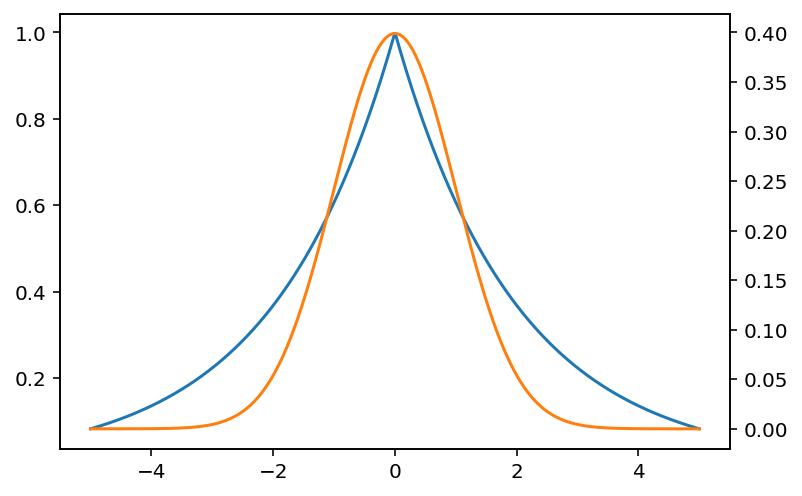

In [79]:
def gamma(x): return jnp.exp(-jnp.abs(x) / 2)

xrange = jnp.linspace(-5, 5, 1000)

fig, ax = plt.subplots()
ax2 = ax.twinx()

l1 = ax.plot(xrange, gamma(xrange), label=r"$\gamma(x)$")
l2 = ax2.plot(xrange, norm.pdf(xrange), c="tab:orange");

In [80]:
key = jax.random.PRNGKey(314)

n_particles = 1000
xn = jax.random.normal(key, (n_particles,))

In [81]:
wn = gamma(xn) / norm.pdf(xn)
wn = wn / wn.sum()

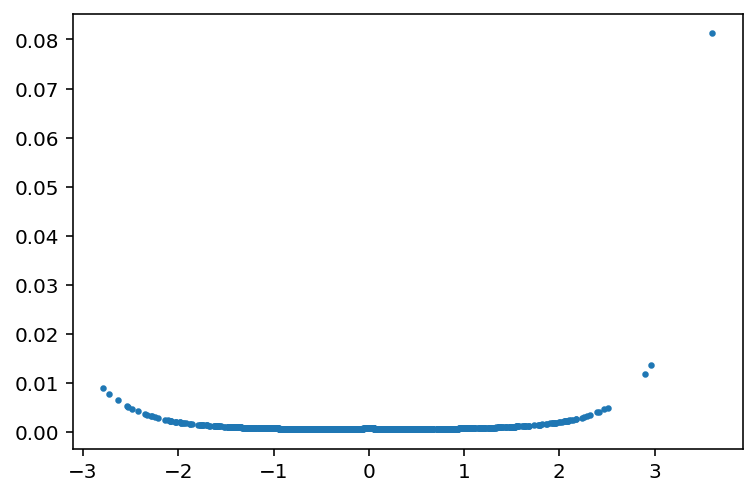

In [82]:
plt.scatter(xn, wn, s=5)

In [86]:
wn.mean()

DeviceArray(0.001, dtype=float32)

In [85]:
1/2

0.5